## Programming for Data Analyis Project Semester (2) 2020
Brendan Ryan GMIT

I have picked on a real world phenomenon in my own professional life. This is what  is the likelyhood of a member of the financial institution I work in availing of a service (in this case take a loan), based on their age, sex and employment status and then look at the the type of product they normally borrow for. 

I will be using the following variables

- AGE
- Gender
- Loan Category
- Employment Status


Import the required libraries
** Give brief descriptoin of what each library does..

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import our Data Set based on the output of ones years lending 


In [2]:
import pandas as pd
df = pd.read_csv('cuanalysis2019.csv')

## Test that our data set has loaded
** note maybe add in here only to load some rows

In [3]:
df

,Month,Loan Type,Age,Gender,Employment Status,Loan Amount Range
0,January,Agri,30,FEMALE,UNEMPLOYED,"1,001 - 5,000"
1,January,Agri,57,FEMALE,PART TIME,"1,001 - 5,000"
2,January,Agri,60,Male,FULL TIME,"1,001 - 5,000"
3,January,Car,22,Male,FULL TIME,"0 - 1,000"
4,January,Car,22,Male,FULL TIME,"0 - 1,000"
...,...,...,...,...,...,...
3915,December,Student,22,FEMALE,STUDENT,"0 - 1,000"
3916,December,Home,35,Male,FULL TIME,"1,001 - 5,000"
3917,December,Home,45,Male,FULL TIME,"0 - 1,000"
3918,December,Home,59,Male,UNEMPLOYED,"1,001 - 5,000"


Test that our improted data looks ok by using df.head and df.tail 

In [4]:
df.head()

,Month,Loan Type,Age,Gender,Employment Status,Loan Amount Range
0,January,Agri,30,FEMALE,UNEMPLOYED,"1,001 - 5,000"
1,January,Agri,57,FEMALE,PART TIME,"1,001 - 5,000"
2,January,Agri,60,Male,FULL TIME,"1,001 - 5,000"
3,January,Car,22,Male,FULL TIME,"0 - 1,000"
4,January,Car,22,Male,FULL TIME,"0 - 1,000"


In [5]:
df.tail()

,Month,Loan Type,Age,Gender,Employment Status,Loan Amount Range
3915,December,Student,22,FEMALE,STUDENT,"0 - 1,000"
3916,December,Home,35,Male,FULL TIME,"1,001 - 5,000"
3917,December,Home,45,Male,FULL TIME,"0 - 1,000"
3918,December,Home,59,Male,UNEMPLOYED,"1,001 - 5,000"
3919,December,Home,75,Male,RETIRED,"0 - 1,000"


Everything looks ok above we can see the shape of our dataframe is correct

Lets have a look at the typoe of varibales we have to work with using the df.dtypes funtion 

In [6]:
df.dtypes

Month                object
Loan Type            object
Age                   int64
Gender               object
Employment Status    object
Loan Amount Range    object
dtype: object

Ok as we can see from above we are dealing with 2 varibales of type object and 1 variable of type int64

In [7]:
df.describe()

,Age
count,3920.000000
mean,45.215816
std,15.609203
min,19.000000
25%,32.000000
50%,44.000000
75%,57.000000
max,89.000000


ok as Age is our only colum of type integer it is the only one which will be returned for statistical values as shown above 

lets have a look at df.info which is another usefulo tol to give us more info on our dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              3920 non-null   object
 1   Loan Type          3920 non-null   object
 2   Age                3920 non-null   int64 
 3   Gender             3920 non-null   object
 4   Employment Status  3920 non-null   object
 5   Loan Amount Range  3920 non-null   object
dtypes: int64(1), object(5)
memory usage: 183.9+ KB


look at making the Financial month a date time # help from https://https://pbpython.com/pandas_dtypes.html

In [9]:
#pd.to_datetime(df["Financial Month"]) - not working lets come back to this and research some more

### Best practice convernt some of our data types into categories 

In [10]:
df[["Gender", "Employment Status","Loan Type"]] = df[["Gender", "Employment Status","Loan Type"]].astype("category")
#df["Loan Interest Code Description"] = df["Loan Interest Code Description"].astype("category")
#df["Employment Status"] = df["Employment Status"].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Month              3920 non-null   object  
 1   Loan Type          3920 non-null   category
 2   Age                3920 non-null   int64   
 3   Gender             3920 non-null   category
 4   Employment Status  3920 non-null   category
 5   Loan Amount Range  3920 non-null   object  
dtypes: category(3), int64(1), object(2)
memory usage: 104.2+ KB


## Reviewing the data to figure out the types of distributions

Count plot
This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value. Command for creating countplot is:

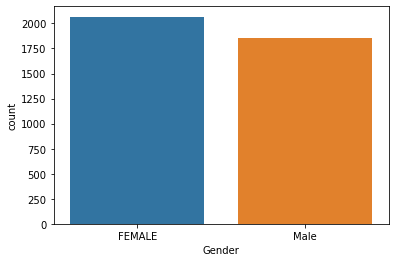

In [12]:
sns.countplot(x='Gender',data=df)
#https://datascienceplus.com/seaborn-categorical-plots-in-python/

In [13]:
df[["Gender","Age"]].groupby("Gender").count()
#https://pandas.pydata.org/pandas-docs/dev/getting_started/intro_tutorials/06_calculate_statistics.html

,Age
Gender,
FEMALE,2067
Male,1853


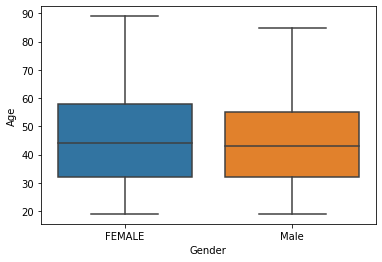

In [14]:
sns.boxplot(x='Gender',y="Age",data=df)

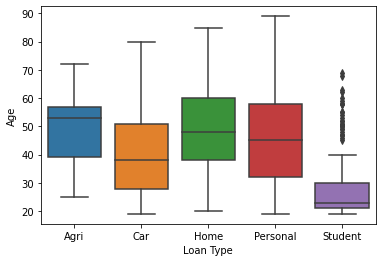

In [15]:
sns.boxplot(x='Loan Type',y="Age",data=df)

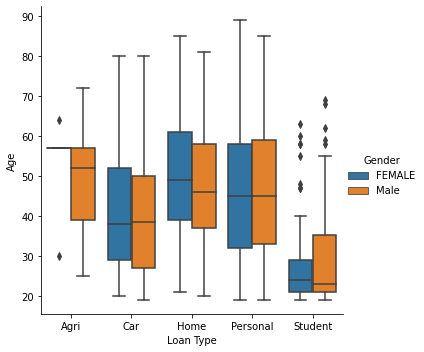

In [22]:
sns.catplot(x="Loan Type", y="Age", hue="Gender", kind="box", data=df)
#https://seaborn.pydata.org/tutorial/categorical.html

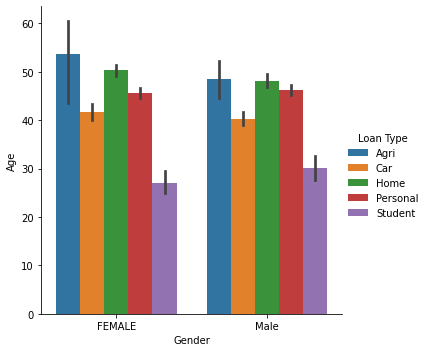

In [25]:
sns.catplot(x="Gender", y="Age", hue="Loan Type", kind="bar", data=df);

## Create the sample random data